Imagine random variable X and a transformation g(X). If g is monotonic, it will preserve the order between different values of X and thus    $\mathop{\mathbb{M}[g(X)]} = g(\mathop{\mathbb{M}[X]})$ where $\mathbb{M}$ represents median. However, the transformation $Z^2$ that we have in the video is not monotoic so we cannot use this rule for that transformation.


We know that pdf of $Y$ is 

\begin{equation*}
f_Y(y) = \frac{1}{\sigma\sqrt{2\pi (y - \mu)}} e^{-\frac{y - \mu}{2\sigma^2}} 

\end{equation*}

Let $F_Y(y)$ be the Cumulative Distribution Function corresponding to $f_Y(y)$:

$$ F_Y(y) = \int_{\mu}^{y} \frac{1}{\sigma \sqrt{2 \pi (y\prime - \mu)}} e^{-\frac{y\prime - \mu}{2\sigma ^2}} dy\prime$$


where the lower bound of the integral is $\mu$, instead of the usual $-\infty$, because $Y \geq \mu$. Defining the following change of variable

$$y_2 = \frac{y\prime - \mu}{2\sigma^2}$$

the integral becomes

$$ F_Y(y) = \frac{1}{\sqrt{\pi}}\int_{0}^{\frac{y - \mu}{2\sigma^2}} \frac{1}{\sqrt{y_2}} e^{-y_2} dy_2 = \frac{1}{\sqrt{\pi}} \gamma(\frac{1}{2}, \frac{y - \mu}{2\sigma^2})$$

where $\gamma$ is the lower incomplete Gamma function [https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gammainc.html].

By definition, the median of $Y$, $\mathbb{M}[Y]$, is

$$\mathbb{M}[Y] = \{y \ | \ F_Y(y) =0.5\}$$

Resulting in

$$ \mathbb{M}[Y] = \mu + 2\sigma^2 \gamma^{-1}(0.5, 0.5)$$


where $\gamma^{-1}$ is the inverse of $\gamma$ function, with the implementation here https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gammaincinv.html, which is the reason why $\pi$ is dropped.


Substituting the value for $\gamma^{-1}(0.5, 0.5)$, one will get


$$ \mathbb{M}[Y] = \mu + 0.4549\sigma^2$$


In [1]:
import numpy as np
import utilityFuncs as uf
import matplotlib.pyplot as plt
from scipy.stats import uniform, chi2
from scipy.special import erf, gammainc, gammaincinv
# gammainc: regularized lower incomplete gamma function

In [2]:
SIGMA = 0.8
MU = 1

In [3]:
def pdf_expression(mean, std, x):
    return (1. / (1. * std * np.sqrt(2. * np.pi * (x - mean)))) * np.exp(-(x - mean) / (2. * std ** 2.))


def Y_pdf(mean, std):
    return lambda x: pdf_expression(mean, std, x)


In [4]:
Y_scale = 10
n = 10000
Y, _ = uf.importance_sampling(Y_pdf(MU, SIGMA), uniform(loc=MU, scale=Y_scale), n)


In [5]:
bins = np.arange(MU, MU + Y_scale, 0.1)

Let's first conform that the CDF is actually $\frac{1}{\sqrt{\pi}} \gamma(\frac{1}{2}, \frac{y - \mu}{2\sigma^2})$


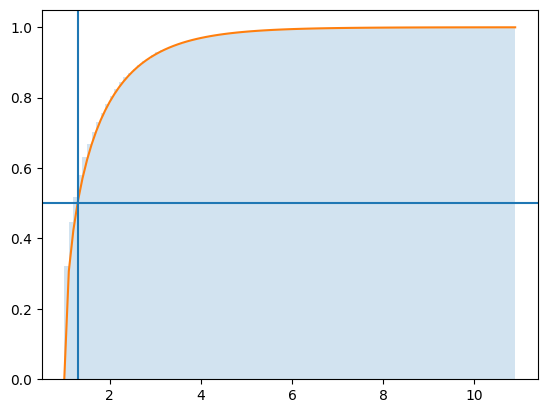

In [17]:
plt.hist(Y, density=True, bins=bins, cumulative=True, alpha=0.2)
plt.plot(bins, gammainc(0.5, (bins - MU)/(2*SIGMA**2)))
plt.axvline(x = MU + 2*SIGMA**2*gammaincinv(0.5, 0.5))
plt.axhline(y = 0.5)

In [7]:
np.median(Y), MU + 0.455*SIGMA**2

(1.2755976171552343, 1.2912000000000001)